In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [ ]:
df.shape

(8068, 11)

**Data PREProcessing**

In [ ]:
df.describe

<bound method NDFrame.describe of           ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4            D  
1                

In [ ]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
#filling null values of categorical data
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])
df['Graduated'] = df['Graduated'].fillna(df['Graduated'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Var_1'] = df['Var_1'].fillna(df['Var_1'].mode()[0])

In [ ]:
#filling null values of numerical data
# using sklearn-pandas package
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
df['Work_Experience']=imputer.fit_transform(df[['Work_Experience']])
df['Family_Size']=imputer.fit_transform(df[['Family_Size']])

In [ ]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
print('Count of each profession\n',df.Profession.value_counts())

Count of each profession
 Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


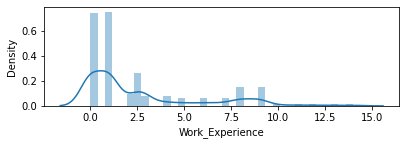

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(2,2,2)
sns.distplot(df.Work_Experience)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


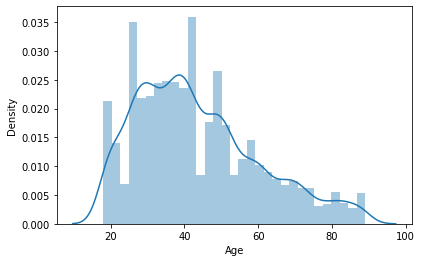

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


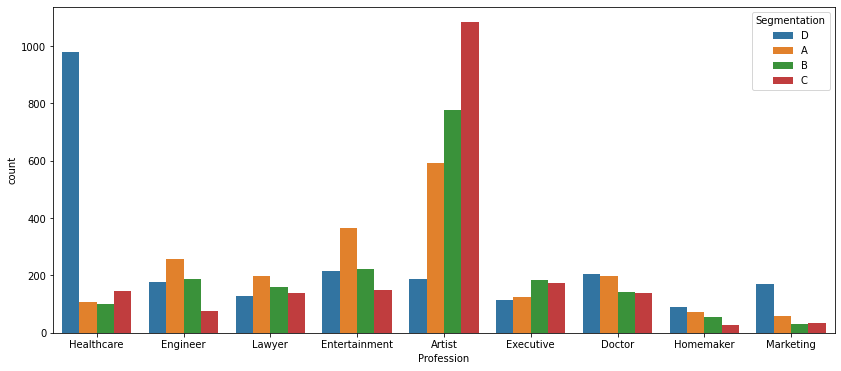

In [ ]:
#Profession
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(df['Profession'],hue=df['Segmentation'])

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [ ]:
print('\tMarried vs Non-Married\t\n',df.Ever_Married.value_counts())
print('\n\tTypes of Professions\t\n',df.Profession.unique())

	Married vs Non-Married	
 Yes    4783
No     3285
Name: Ever_Married, dtype: int64

	Types of Professions	
 ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


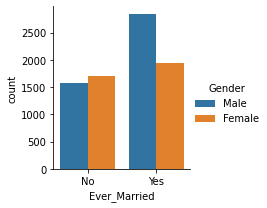

In [ ]:
sns.catplot(x='Ever_Married',data=df,kind='count',height=3,aspect=1,hue="Gender")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


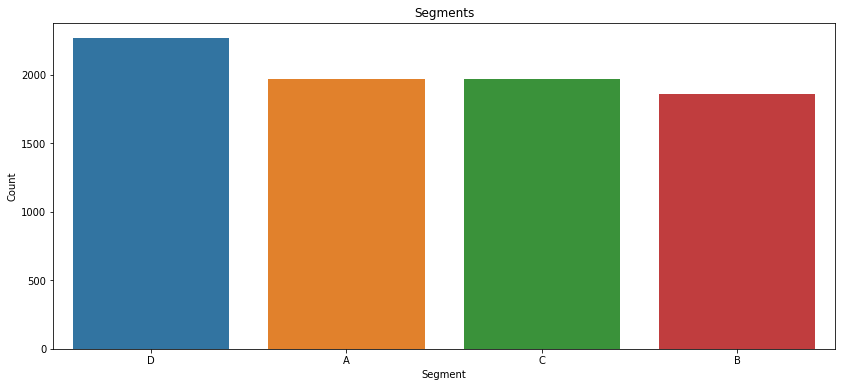

In [ ]:
segments = df.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(segments.index , segments.values).set_title('Segments')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


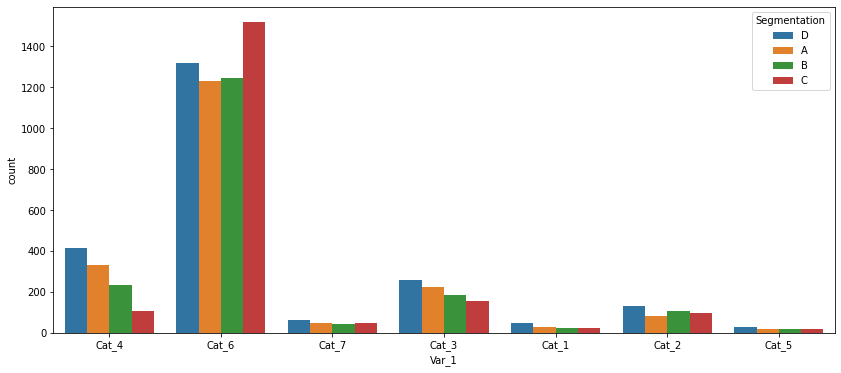

In [ ]:
#Var_1
sns.countplot(df['Var_1'],hue=df['Segmentation'])

# **Converting Categorical Data to Numerical Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=list(df.columns[df.dtypes == object])
le=LabelEncoder()
for i in cols:
    try:
        df[i]=le.fit_transform(df[i])
    except:
        print("error encoding")

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.000000,2,4.0,3,3
1,462643,0,1,38,1,2,2.641663,0,3.0,3,0
2,466315,0,1,67,1,2,1.000000,2,1.0,5,1
3,461735,1,1,67,1,7,0.000000,1,2.0,5,1
4,462669,0,1,40,1,3,2.641663,1,6.0,5,0


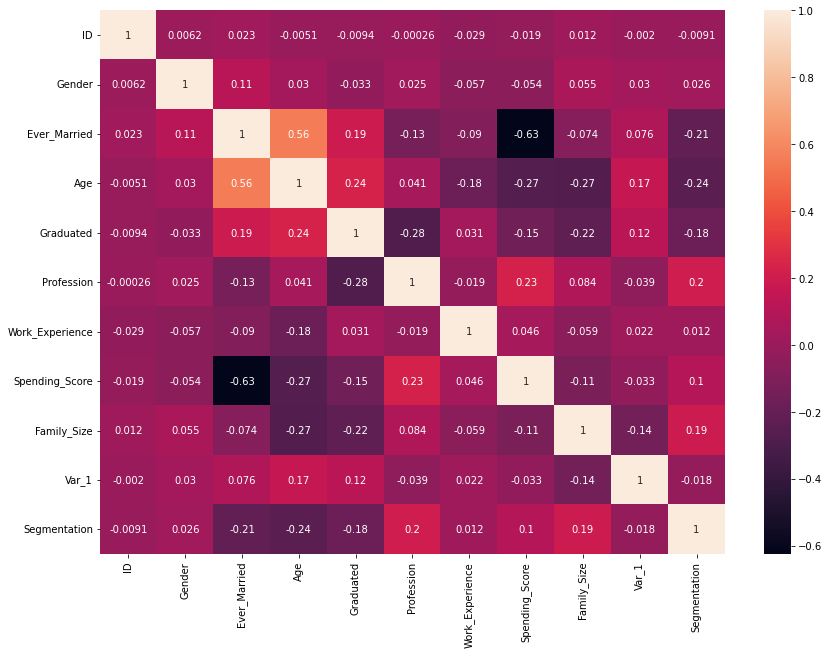

In [ ]:
#heatmap
fig,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


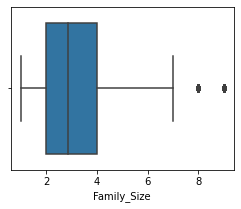

In [ ]:
fig,ax = plt.subplots(figsize=(4,3))
sns.boxplot(df['Family_Size'])

# **Outlier Detection**

In [ ]:
#using Inter quartile range method 
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3-Q1
new_df = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
new_df.shape

(7720, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


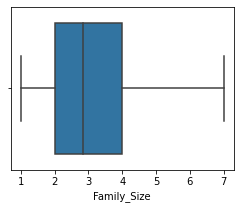

In [ ]:
fig,ax = plt.subplots(figsize=(4,3))
sns.boxplot(new_df['Family_Size'])

# Model Fitting

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
 # KMeans Clustering
kmeans = KMeans(4, random_state = 42).fit(X_scaled)
labels = kmeans.labels_
kmeans.rd_.shape
rd = pd.DataFrame(data = kmeans.rd_, columns = [df.columns])
rd = scaler.inverse_transform(rd)
rd = pd.DataFrame(data=rd,columns=[df.columns])
r_kmeans = kmeans.fit_predict(X_scaled)
df_cluster = pd.concat([df,pd.DataFrame({'Cluster':labels})],axis=1)

df_cluster = pd.concat([df,pd.DataFrame({'Cluster':labels})],axis=1)

df_cluster.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster
0,462809,1,0,22,0,5,1.000000,2,4.0,3,3,3
1,462643,0,1,38,1,2,2.641663,0,3.0,3,0,0
2,466315,0,1,67,1,2,1.000000,2,1.0,5,1,1
3,461735,1,1,67,1,7,0.000000,1,2.0,5,1,1
4,462669,0,1,40,1,3,2.641663,1,6.0,5,0,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(X_scaled)
principal_comp
pca_X = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_X.head()
pca_X = pd.concat([pca_X,pd.DataFrame({'Cluster':labels})] ,axis=1)
pca_X.head()


,pca1,pca2,Cluster
0,2.756563,1.233211,3
1,-1.481033,0.048486,0
2,-1.604376,-1.314143,1
3,-1.609414,0.490516,1
4,-0.760125,0.459496,0


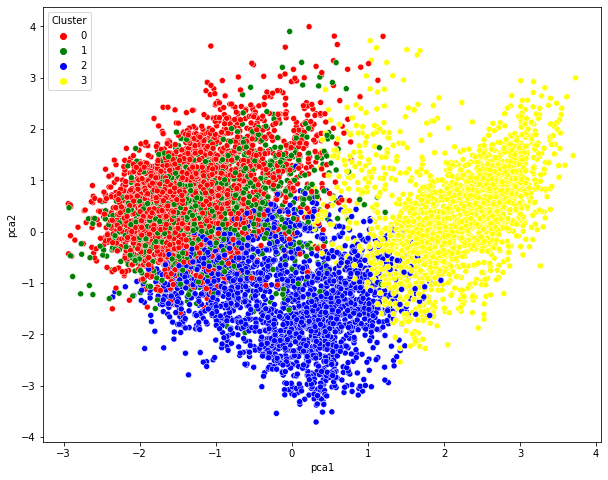

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_X, palette = ['red','green','blue','yellow'])
plt.show()

In [ ]:
pred = model.predict(x_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)